In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [54]:
from sklearn.datasets import load_iris
iris_data = load_iris()

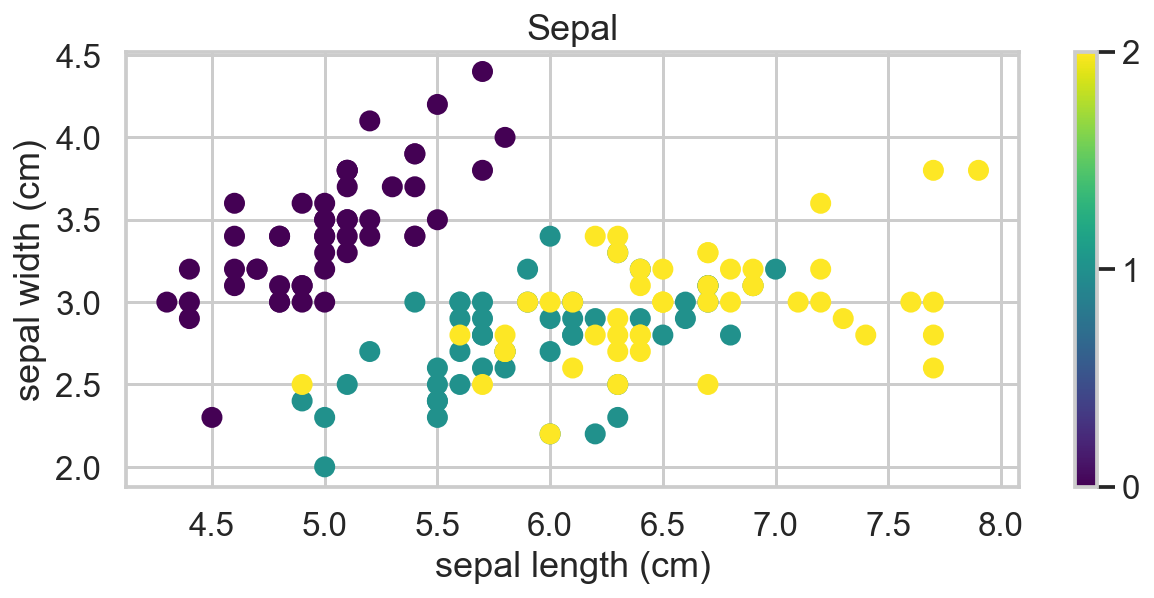

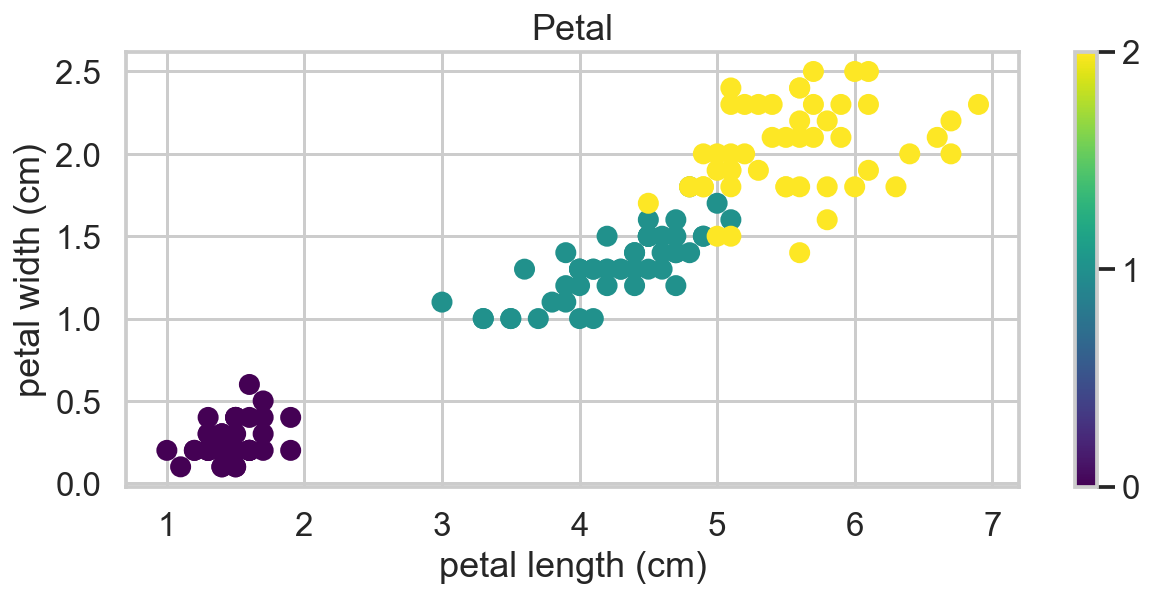

In [55]:
def Show_Diagram(x_label,y_label,title):
    plt.figure(figsize=(10,4))
    plt.scatter(iris_data.data[:,x_label], iris_data.data[:,y_label], c=iris_data.target, cmap=cm.viridis)
    plt.xlabel(iris_data.feature_names[x_label])
    plt.ylabel(iris_data.feature_names[y_label]);
    plt.title(title)
    plt.colorbar(ticks=([0, 1, 2]));
    plt.show();

# Display the first two features related to Sepal width and height
Show_Diagram(0,1,'Sepal')

# Display the last two features related to Petal width and height
Show_Diagram(2,3,'Petal')

In [56]:
# Separate and analyze our iris data set to train and test
# 80% train 20% test


def separate_data(iris_dataset):
    '''
    E.g A: [array([5.1, 3.5, 1.4, 0.2, 0. ]), array([4.9, 3. , 1.4, 0.2, 0. ]), array([4.7, 3.2, 1.3, 0.2, 0. ]), ...]
    '''
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    
    '''
    train: [[5.1 3.5 1.4 0.2 0. ]
             [4.9 3.  1.4 0.2 0. ]
             [4.7 3.2 1.3 0.2 0. ] ... ]
    '''
    #Merge trainin data
    train = np.concatenate((A,B,C))
    #Merge test data
    test = np.concatenate((tA, tB, tC))
    
    return train, test

In [57]:
# Join X (features) and Y (clasess, labels, output) in a single 'table'
iris_dataset = np.column_stack((iris_data.data, iris_data.target.T))
iris_dataset = list(iris_dataset)

# Separate data between train and test excluding the last column
train_file, test_file = separate_data(iris_dataset)
train_x = np.array([k[:4] for k in train_file])
train_y = np.array([k[4] for k in train_file])
test_X = np.array([k[:4] for k in test_file])
test_y = np.array([k[4] for k in test_file])

Text(0, 0.5, 'petal width (cm)')

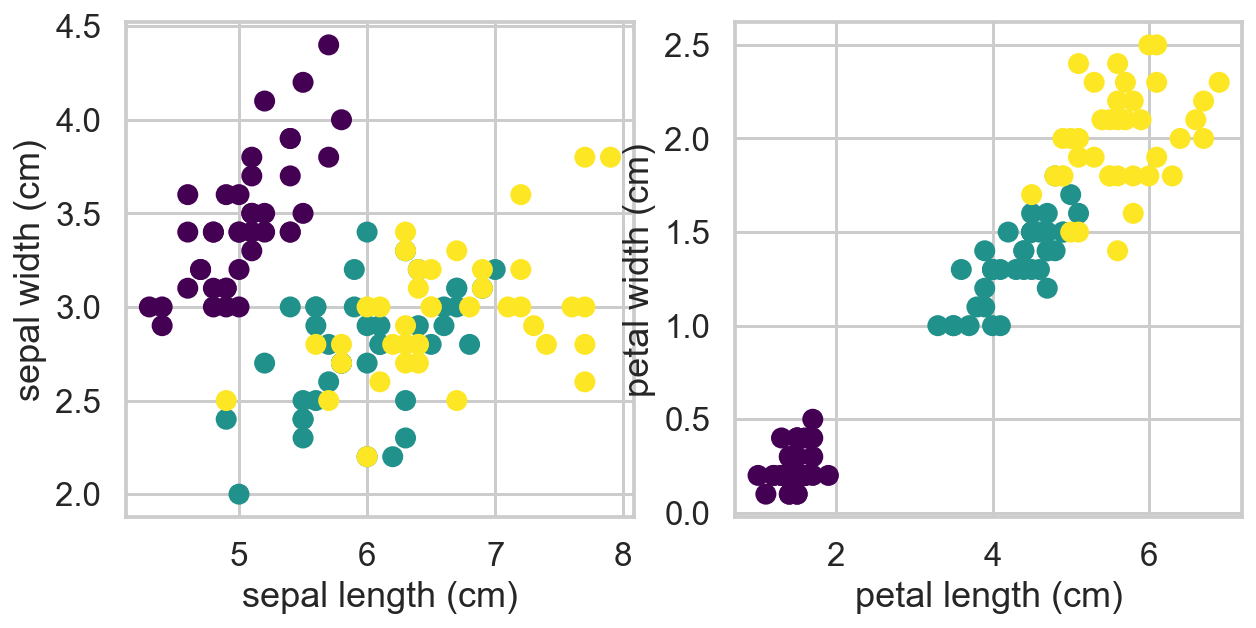

In [58]:
# Show training samples
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])

plt.subplot(2,2,4)
plt.scatter(train_x[:,2], train_x[:,3], c=train_y, cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

Text(0, 0.5, 'petal width (cm)')

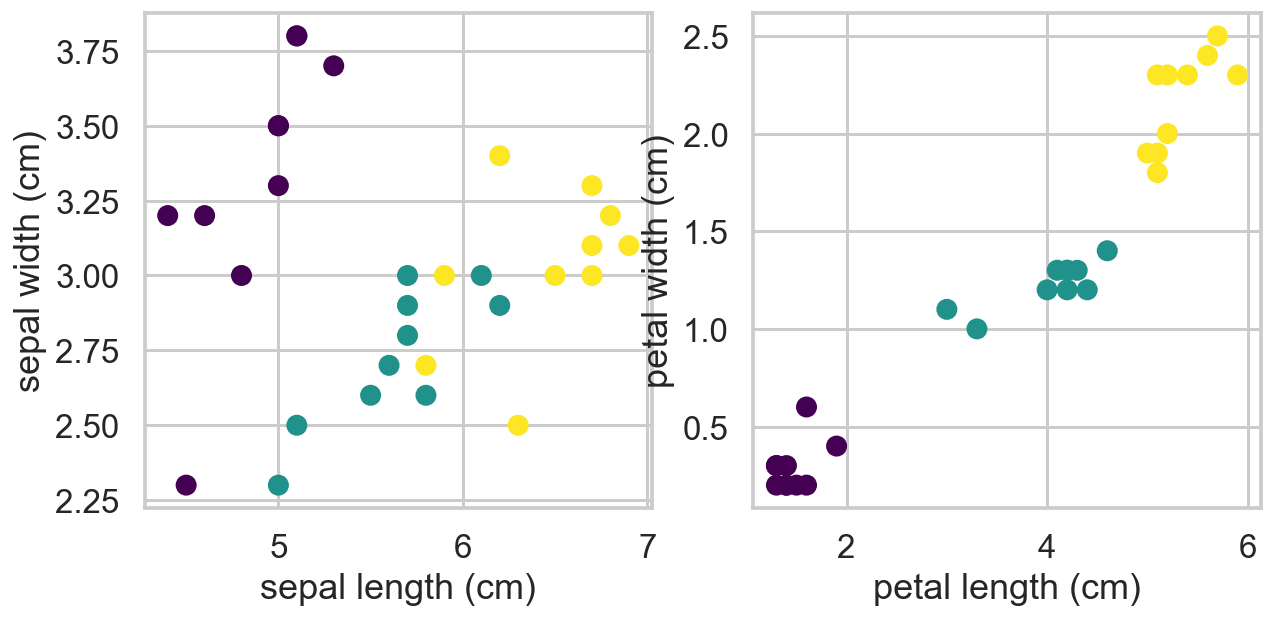

In [59]:
# Show test samples
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
plt.scatter(test_X[:,0], test_X[:,1], c=test_y, cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])

plt.subplot(2,2,4)
plt.scatter(test_X[:,2], test_X[:,3], c=test_y, cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

In [60]:
def cost_derivate_gradient(n, Ti, Oi, X):
    '''
    Represents the diference between the real value and the calculated value
    for each row
    E.g (Ti - Oi): [[ 0.66666667 -0.33333333 -0.33333333]
    X.T shape: (4, 120)
    (Ti - Oi).shape: (120, 3)
    '''
    result = -(np.dot(X.T, (Ti - Oi))) / n
    '''
    E.g result : [[ 0.28416667 -0.04       -0.24416667]
     [-0.12944444  0.09472222  0.03472222]
     [ 0.77833333 -0.17416667 -0.60416667]
     [ 0.31888889 -0.05277778 -0.26611111]]
    '''
    return result

In [61]:
def function_cost_J(n, Ti, Oi):
    '''
    (Ti * np.log(Oi)): [[-1.09861229 -0.         -0.        ] ... ]
    (Ti * np.log(Oi)).shape: (120, 3)
    '''
    result = -(np.sum(Ti * np.log(Oi))) / n
    return result

In [62]:
# One hot encoding is the clasification into classes, the return format is:
# [[1,0,0],
#  [0,1,0],
#  [1,0,0],
#  [1,0,0]] ...
# Oi

def one_hot_encoding(Y):
    OneHotEncoding = []
    encoding = []
    for i in range(len(Y)):
        if(Y[i] == 0): encoding = np.array([1,0,0]) #Class 1, if y = 0
        elif(Y[i] == 1): encoding = np.array([0,1,0]) #Class 2, if y = 1
        elif(Y[i] == 2): encoding = np.array([0,0,1]) #Class 3, if y = 2

        OneHotEncoding.append(encoding)
    return OneHotEncoding

In [63]:
def accuracy_graphic(answer_graph):
    labels = 'Hits', 'Faults'
    sizes = [96.5, 3.3]
    explode = (0, 0.14)
    fig1, ax1 = plt.subplots()
    ax1.pie(answer_graph, explode=explode, colors=['green','red'], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

In [64]:
def softmax(z):
    soft = (np.exp(z).T / np.sum(np.exp(z), axis=1)).T
    return soft

In [65]:
def show_probability(arrayProbability):
    print("probability: [Class 0, Class 1, Class 2]")
    arrayTotal = []
    
    for k in arrayProbability:
        k[0] = "%.3f" % k[0]
        k[1] = "%.3f" % k[1]
        k[2] = "%.3f" % k[2]
        arrayTotal.append(k)
        
    id_ = 0
    
    for k in arrayTotal:
        prob0 = k[0] * 100
        prob1 = k[1] * 100
        prob2 = k[2] * 100
        id_ += 1
        
        string = "         {}:  {}%,   {}%,   {}%".format(id_, "%.3f" % prob0, 
                                                                   "%.3f" % prob1, 
                                                                "%.3f" % prob2)
        print(string)
        
    

In [66]:
def predict(X, Y, weights):
    v_resp = []
    iris_set = iris_vers = iris_virg = 0
    n = len(Y)
    z = np.dot(X, weights)
    
    Oi = softmax(z)
    '''
    E.g prevision: [0 0 0 0 0 0 0 0 0 0 2 2 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
    '''
    prevision = np.argmax(Oi, axis=1)
    show_probability(Oi)
    print("")
    procent = sum(prevision == Y) / n
    print("ID-Sample | Class clasification | Output | Hoped output")
    
    for i in range(len(prevision)):
        if(prevision[i] == 0): print(" id :",i,"          | Iris-Setosa        |  Output:",prevision[i],"   |",Y[i])
        if(prevision[i] == 1): print(" id :",i,"          | Iris-Versicolour        |  Output:",prevision[i],"   |",Y[i])
        if(prevision[i] == 2): print(" id :",i,"          | Iris-Virginica        |  Output:",prevision[i],"   |",Y[i]) 
            
    
    for i in range(len(prevision)):
        if(prevision[i] == Y[i])and(prevision[i] == 0): iris_set +=1
        elif(prevision[i] == Y[i])and(prevision[i] == 1): iris_vers +=1
        elif(prevision[i] == Y[i])and(prevision[i] == 2): iris_virg +=1
            
    
    correct = procent * 100
    incorrect = 100 - correct
    v_resp.append(correct)
    v_resp.append(incorrect)
    
    accuracy_graphic(v_resp)
    return "%.2f"%(correct), iris_set, iris_vers, iris_virg
        

In [67]:
def show_err_graphic(v_epoch, v_error):
    plt.figure(figsize=(9,4))
    plt.plot(v_epoch, v_error, "m-")
    plt.xlabel("Number of Epoch")
    plt.ylabel("Error")
    plt.title("Error minimization")
    plt.show()

In [68]:
#Ti = one hot encoding output. Represents the real value (class for each row)
#Oi = softmax output. Represents the calculated value (class calculation for each row)
def fit(X, Y, weights, learningRate):
    v_epoch = []
    totalError = []
    epochCount = 0
    n = len(X)
    gradientE = []
    
    while(epochCount < 1000):
        '''
        X shape: (120, 4)
        weights shape: (4, 3)
        Oi shape: (120, 3) [[0.33333333 0.33333333 0.33333333] ... ]
        Ti len: 120 [array([1, 0, 0]), array([1, 0, 0]), array([0, 1, 0]), array([0, 0, 1]), ...]
        '''
        Ti = one_hot_encoding(Y)
        Z = np.dot(X, weights)
        Oi = softmax(Z)
        erro = function_cost_J(n, Ti, Oi)
        gradient = cost_derivate_gradient(n, Ti, Oi, X)
        
        '''
        Update weights
        '''
        weights = weights - learningRate * gradient
        
        if(epochCount % 100 == 0):
            totalError.append(erro)
            gradientE.append(gradient)
            v_epoch.append(epochCount)
            print("Epoch ", epochCount, " Total Error:", "%.4f" % erro)
            
        epochCount += 1
        
    show_err_graphic(v_epoch, totalError)
    
    return weights
    

Epoch  0  Total Error: 1.0986
Epoch  100  Total Error: 0.9140
Epoch  200  Total Error: 0.8019
Epoch  300  Total Error: 0.7255
Epoch  400  Total Error: 0.6709
Epoch  500  Total Error: 0.6302
Epoch  600  Total Error: 0.5986
Epoch  700  Total Error: 0.5732
Epoch  800  Total Error: 0.5522
Epoch  900  Total Error: 0.5345


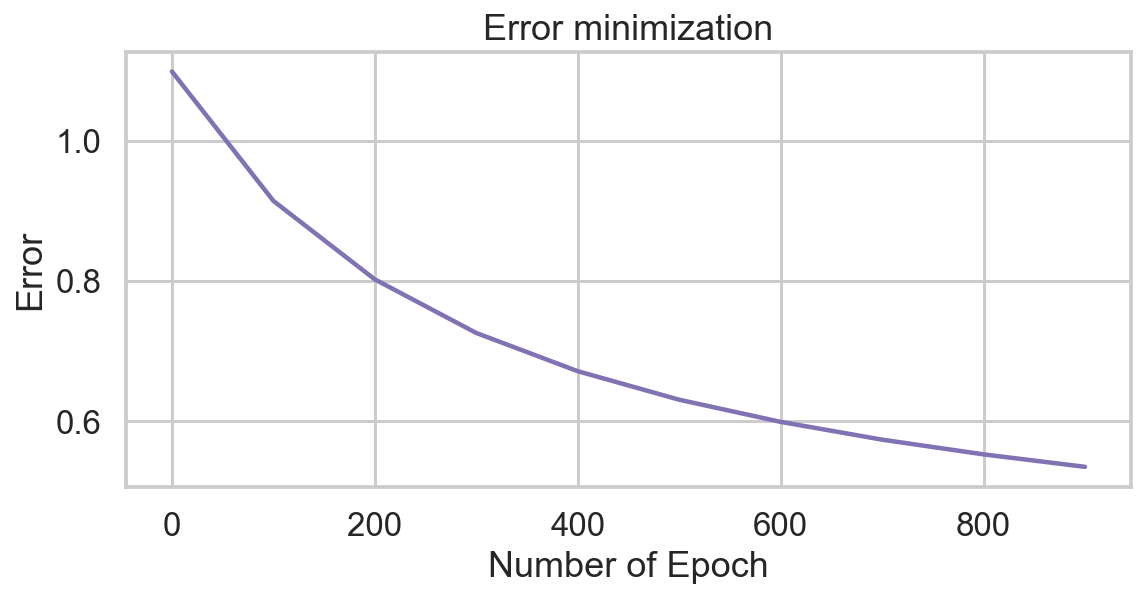

probability: [Class 0, Class 1, Class 2]
         1:  83.300%,   12.800%,   3.900%
         2:  65.900%,   24.400%,   9.700%
         3:  78.800%,   15.700%,   5.600%
         4:  76.800%,   17.000%,   6.200%
         5:  77.300%,   16.700%,   6.000%
         6:  75.400%,   18.200%,   6.400%
         7:  83.100%,   12.900%,   4.000%
         8:  77.900%,   16.400%,   5.700%
         9:  84.100%,   12.400%,   3.500%
         10:  80.500%,   14.900%,   4.600%
         11:  8.100%,   43.100%,   48.800%
         12:  9.400%,   44.200%,   46.300%
         13:  12.800%,   45.600%,   41.600%
         14:  17.700%,   44.200%,   38.100%
         15:  10.400%,   43.800%,   45.800%
         16:  13.500%,   44.300%,   42.300%
         17:  12.100%,   44.100%,   43.800%
         18:  12.500%,   46.000%,   41.600%
         19:  25.000%,   42.700%,   32.400%
         20:  12.400%,   44.400%,   43.200%
         21:  2.700%,   36.400%,   60.900%
         22:  5.100%,   41.400%,   53.600%
         23:  

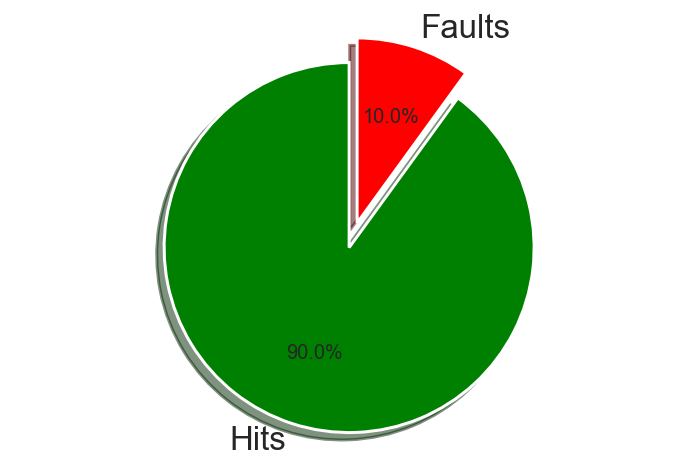

In [69]:
learningRate = 0.003
# The weights rows corresponds to the number of features and the columns to number of classes
weights = np.zeros((4,3))
weights = fit(train_x, train_y, weights, learningRate)

#Predict
acc_test,test_set,test_vers,test_virg = predict(test_X, test_y, weights)

- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 70.00 %
- Acurracy Iris-Virginica: 100.00 %


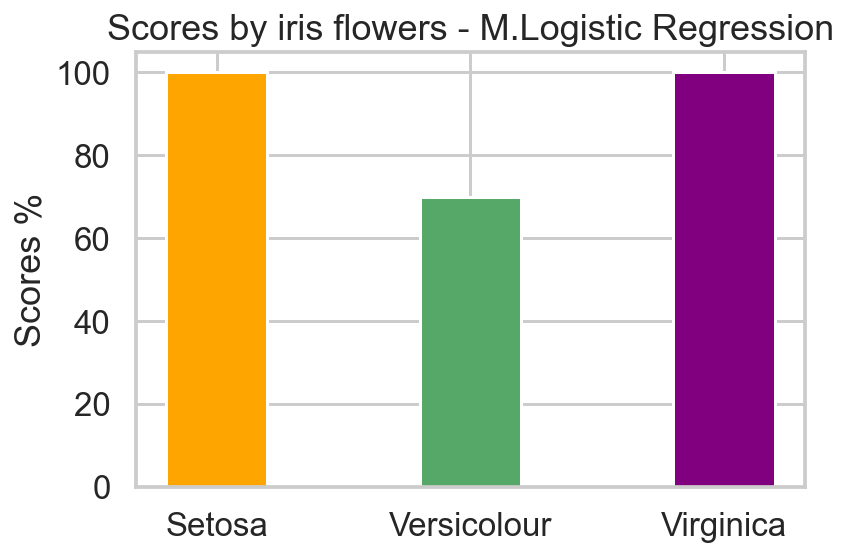

In [70]:
# Accuracy bar graphic
iris_set = iris_vers = iris_virg = 0

for i in range(len(test_y)):
    if(test_y[i] == 0): iris_set +=1
    elif(test_y[i] == 1): iris_vers +=1
    elif(test_y[i] == 2): iris_virg +=1

ac_set = (test_set / iris_set) * 100
ac_vers = (test_vers / iris_vers) * 100
ac_virg = (test_virg / iris_virg) * 100

print("- Acurracy Iris-Setosa:","%.2f"%ac_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%ac_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%ac_virg, "%")


plt.subplots()
names = ["Setosa", "Versicolour", "Virginica"]
x1 = [2.0,4.0,6.0]
plt.bar(x1[0], ac_set, color='orange')
plt.bar(x1[1], ac_vers, color='g')
plt.bar(x1[2], ac_virg, color='purple', label="Iris-Virginica")
plt.ylabel('Scores %')
plt.xticks(x1, names)
plt.title("Scores by iris flowers - M.Logistic Regression")
plt.show()